In [211]:
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [212]:
test_data = pd.read_csv("../../../../../res/churndata/test.csv")
train_data = pd.read_csv("../../../../../res/churndata/training.csv")
unseen_data = pd.read_csv("../../../../../res/churndata/unseen.csv")

X_train = train_data.drop(["Churn?"], axis=1)
X_test = test_data.drop(["Churn?"], axis=1)
X_unseen = unseen_data.drop(["Churn?"], axis=1)

y_train = train_data["Churn?"]
y_test = test_data["Churn?"]
y_unseen = unseen_data["Churn?"]


In [213]:
y_test.value_counts()


0    565
1    101
Name: Churn?, dtype: int64

In [214]:

# n_estimators is the number of bootstrapped decision trees
# that will be produced
clf = RandomForestClassifier(n_estimators=40)
clf.fit(X_train, y_train)
clf

RandomForestClassifier(n_estimators=40)

In [215]:
print(f'Train Accuracy: {clf.score(X_train, y_train)}')
print(f'Test Accuracy: {clf.score(X_test, y_test)}')
print(f'Unseen Accuracy: {clf.score(X_unseen, y_unseen)}')


Train Accuracy: 0.9987141020145736
Test Accuracy: 0.9474474474474475
Unseen Accuracy: 0.9491017964071856


<AxesSubplot:>

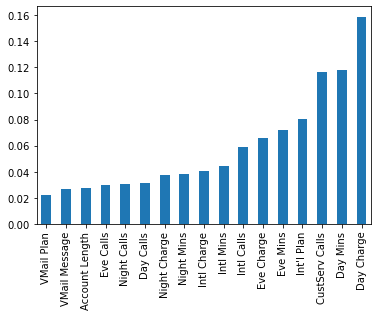

In [216]:
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
df_importances = forest_importances.to_frame()

df_importances = df_importances.rename(columns={0: "importance"})
df_importances = df_importances.sort_values(by='importance')
df_importances.plot.bar(legend=False)


In [217]:
from sklearn.model_selection import cross_val_predict
y_predicted = cross_val_predict(clf, X_test, y_test, cv=5) 
y_predicted[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)


#### '----------START OF TEST SCORES -----------------'


[[554  11]
 [ 60  41]]
True negatives: 554
False negatives: 60
True Positives: 41
False Positives: 11


Text(24.0, 0.5, 'Truth')

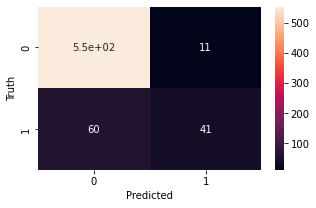

In [218]:
# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted, labels=[0, 1])
print(cm)
print("True negatives: " + str(cm[0][0]))
print("False negatives: " + str(cm[1][0]))
print("True Positives: " + str(cm[1][1]))
print("False Positives: " + str(cm[0][1]))
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [219]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.8933933933933934

In [220]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predicted)

0.7884615384615384

In [221]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predicted)


0.40594059405940597

In [222]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)


0.6932357837553667

#### '----------START OF UNSEEN SCORES -----------------'

In [246]:
from sklearn.model_selection import cross_val_predict
y_predicted = cross_val_predict(clf, X_unseen, y_unseen, cv=5) 


In [247]:
y_predicted[:150]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

[[279   8]
 [ 32  15]]
True negatives: 279
False negatives: 32
True Positives: 15
False Positives: 8


Text(24.0, 0.5, 'Truth')

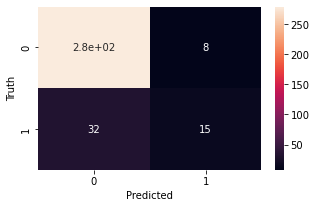

In [248]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_unseen, y_predicted, labels=[0, 1])
print(cm)
print("True negatives: " + str(cm[0][0]))
print("False negatives: " + str(cm[1][0]))
print("True Positives: " + str(cm[1][1]))
print("False Positives: " + str(cm[0][1]))
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [249]:
from sklearn.metrics import accuracy_score
accuracy_score(y_unseen, y_predicted)

0.8802395209580839

In [250]:
from sklearn.metrics import precision_score
precision_score(y_unseen, y_predicted)

0.6521739130434783

In [251]:
from sklearn.metrics import recall_score
recall_score(y_unseen, y_predicted)


0.3191489361702128

In [252]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_unseen, y_predicted)


0.6456371858551412

In [254]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_unseen, y_unseen, cv=5).mean()

0.8802351876978742

In [ ]:
pinapartition sa K parts yung data kunware 5
yung isa don magiging test data bawat iter
ITER: 1
partition1 = test data
partition2 = train data
partition3 = train data
partition4 = train data
partition5 = train data
ITER: 2
partition1 = train data
partition2 = test data
partition3 = train data
partition4 = train data
partition5 = train data
